In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 生成用于聚类分析的数据集
# n_samples=250: 样本数量为250 , centers=5: 聚类中心数为5 , n_features=2: 特征数量为2 , random_state=0: 随机种子保证结果可复现
X, y = make_blobs(n_samples=250, centers=5, n_features=2, random_state=0)


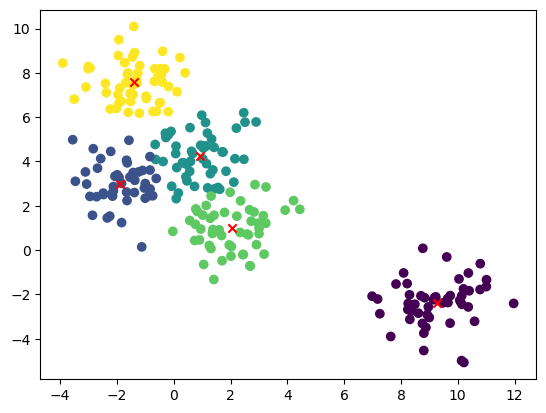

In [2]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
z = kmeans.labels_
center = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=z)
plt.scatter(center[:,0], center[:,1], marker = 'x', c='red')
plt.show()

# 1. 已知标签

In [3]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,z)

0.8759906039211783

In [4]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(y,z)

np.float64(0.8664898419417402)

In [5]:
from sklearn.metrics import v_measure_score
v_measure_score(y,z)

np.float64(0.8692143086846837)

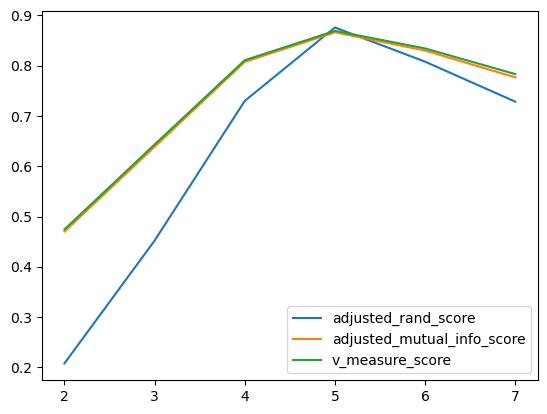

In [ ]:
ari_curve = []
ami_curve = []
vm_curve = []
clus = [2, 3, 4, 5, 6, 7]
for n_clusters in clus:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    z = clusterer.labels_
    ari_curve.append(adjusted_rand_score(y,z))
    ami_curve.append(adjusted_mutual_info_score(y,z))
    vm_curve.append(v_measure_score(y,z))

plt.plot(clus, ari_curve, label='adjusted_rand_score')
plt.plot(clus, ami_curve, label='adjusted_mutual_info_score')
plt.plot(clus, vm_curve, label='v_measure_score')
plt.legend()
plt.show()
# 可以看到3个指标在聚类数为5时都达到了最大值，说明5个聚类中心是最优的(实际数据也是5个聚类中心)

# 2. 未知标签

## 轮廓系数

In [7]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
cluster_labels = kmeans.labels_
si = silhouette_score(X, cluster_labels)
si

np.float64(0.5526182828135061)

In [8]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def show_silhouette_plot(model, X):
    for n_clusters in [2, 3, 4, 5, 6, 7]:
        fig, (pic1, pic2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)
        model.n_clusters = n_clusters
        clusterer = model.fit(X)
        cluster_labels = clusterer.labels_
        centers = clusterer.cluster_centers_
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 1
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            pic1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values, facecolor = color)
            pic1.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 1

        pic1.axvline(x = silhouette_avg, color = 'red', linestyle = "--")
        pic1.set_title("score: {0}".format(silhouette_avg))

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        pic2.scatter(X[:,0], X[:,1], marker = 'o', c = colors)
        pic2.scatter(centers[:, 0], centers[:, 1], marker = 'x', c = 'red', alpha = 1, s = 200)
        pic2.set_title("k: {0}".format(n_clusters))

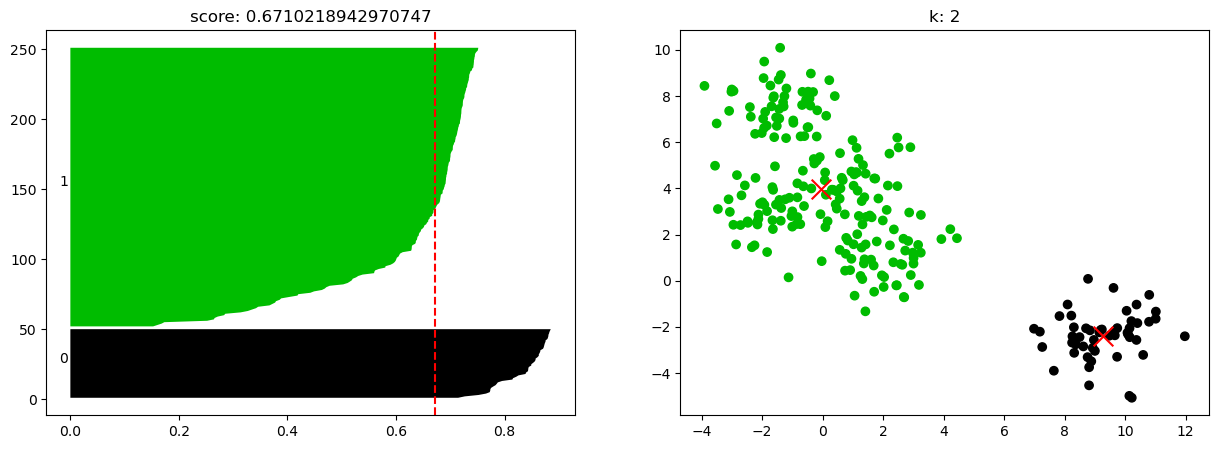

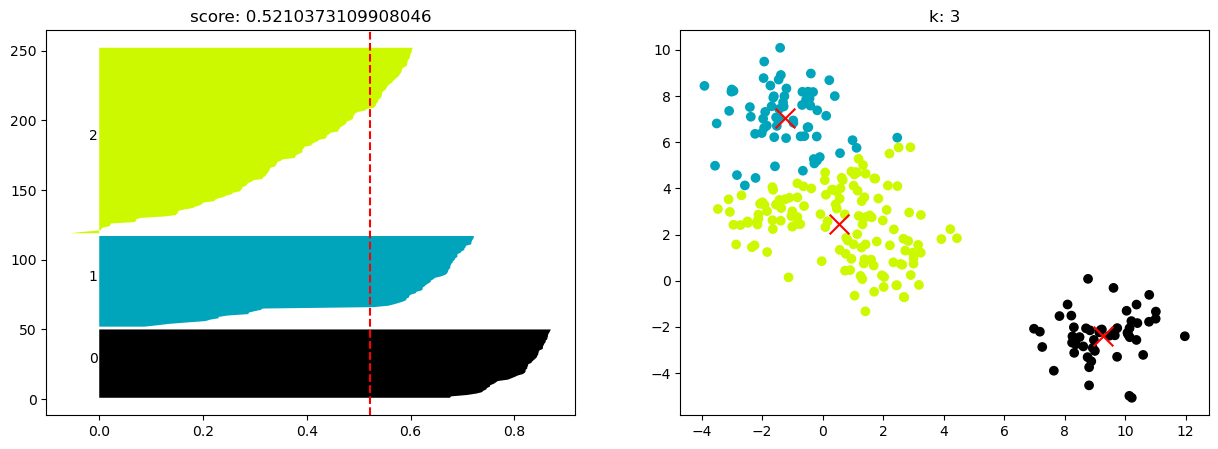

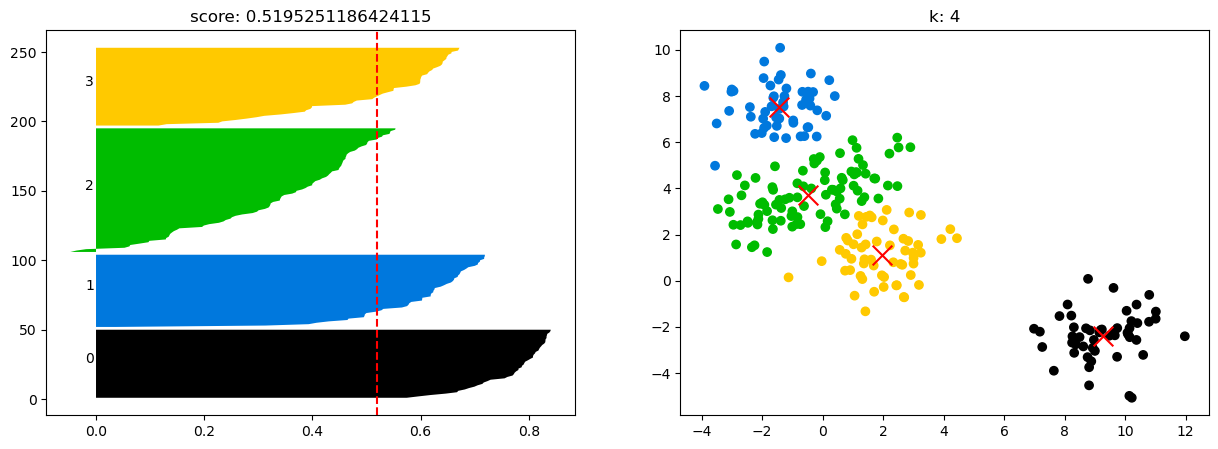

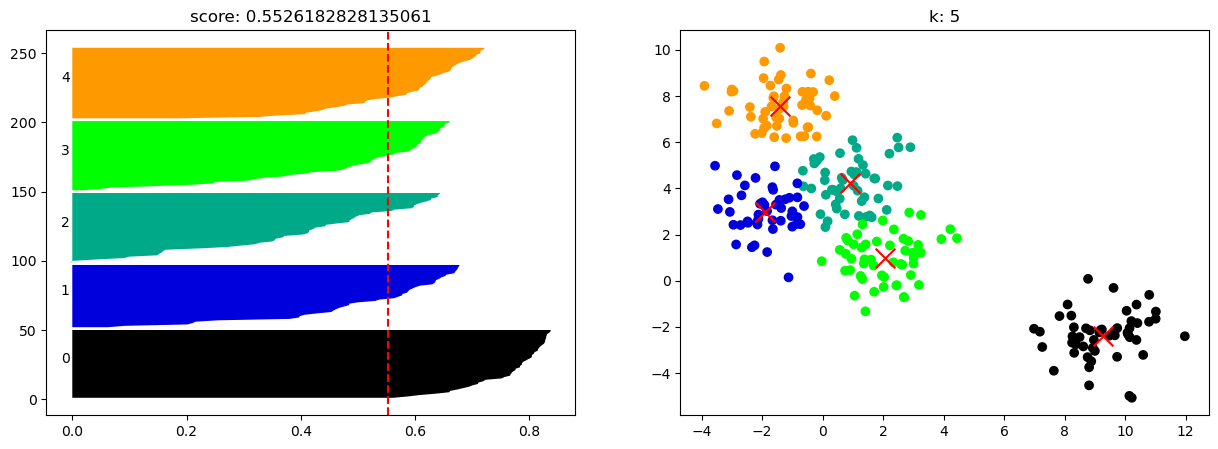

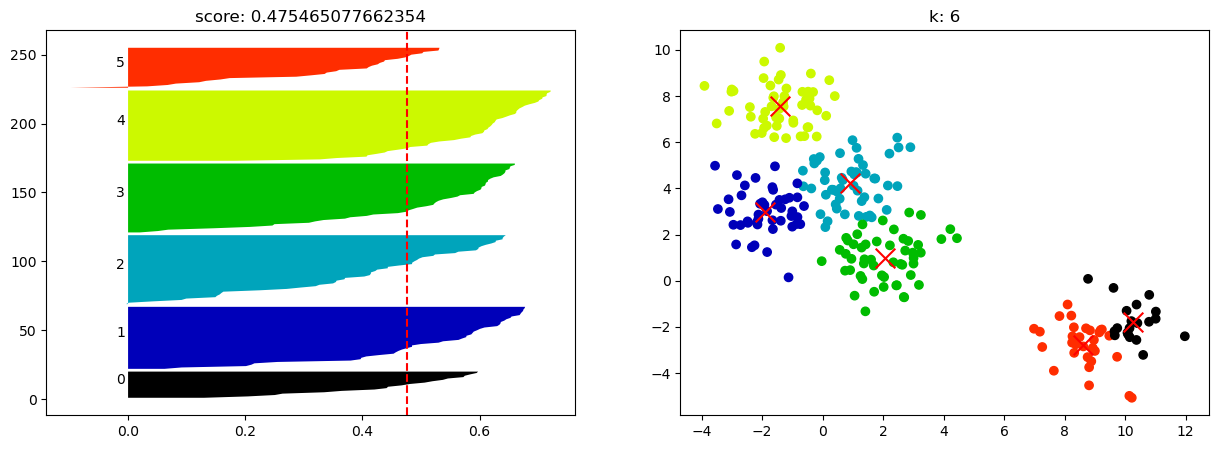

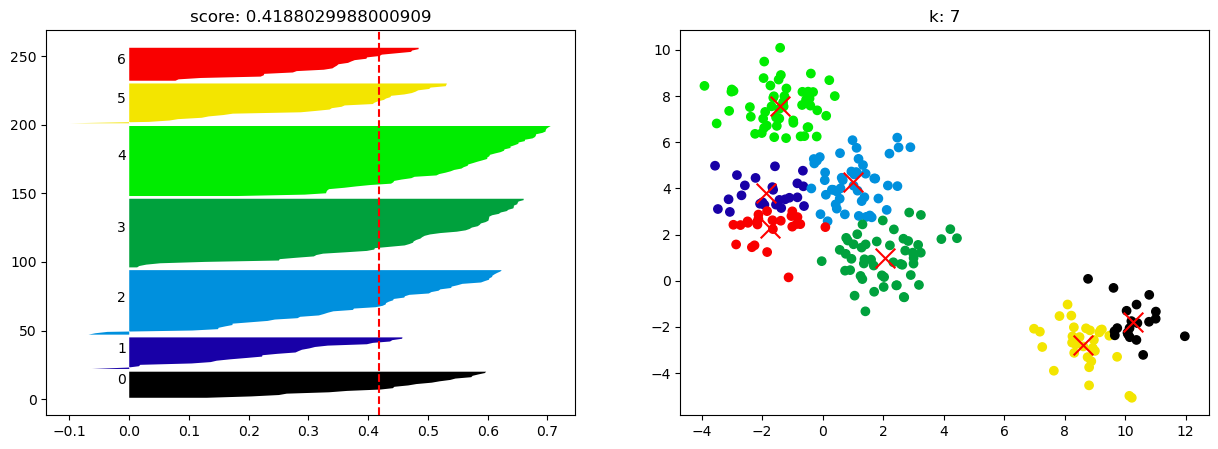

In [ ]:
show_silhouette_plot(kmeans, X)
# 通过轮廓系数图可以看到，聚类数为2时，轮廓系数最大，说明2个聚类中心是最优的 (其实不靠谱，实际数据是5个聚类中心)
# 轮廓系数图的结果和其他3个指标的结果不一致，说明轮廓系数图不适合这个数据集

## CHI

In [10]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, y)

np.float64(850.6346471314978)

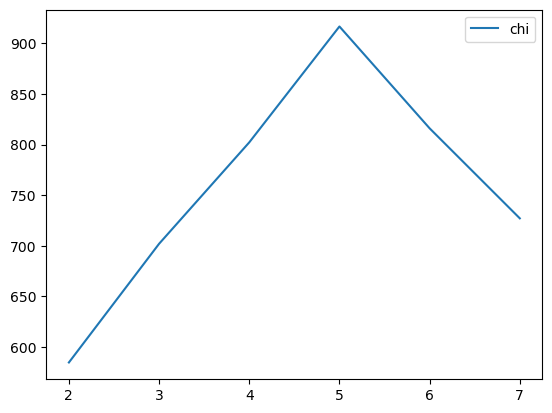

In [ ]:
chi_curve = []

clus = [2, 3, 4, 5, 6, 7]
for n_clusters in clus:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    z = clusterer.labels_
    chi_curve.append(calinski_harabasz_score(X,z))

plt.plot(clus, chi_curve, label='chi')
plt.legend()
plt.show()
# n=5时取得最大值850.63